In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [2]:

missing = df.isnull().sum()
print(missing)

print("Duplicate rows:", df.duplicated().sum())


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
Duplicate rows: 1


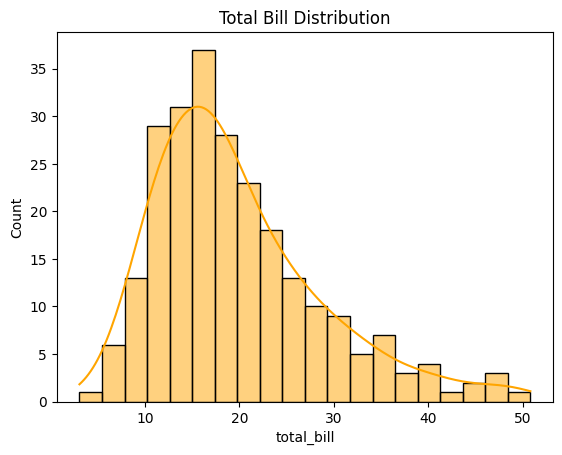

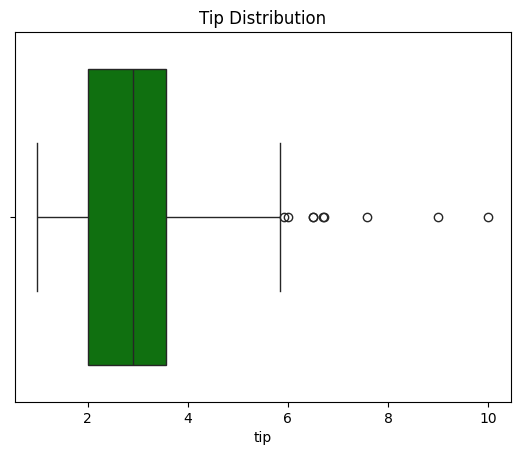

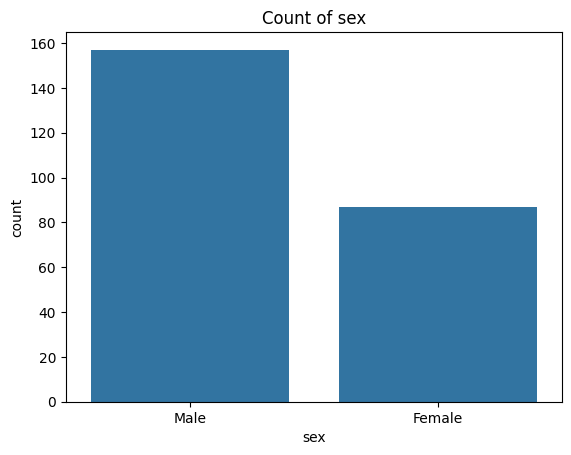

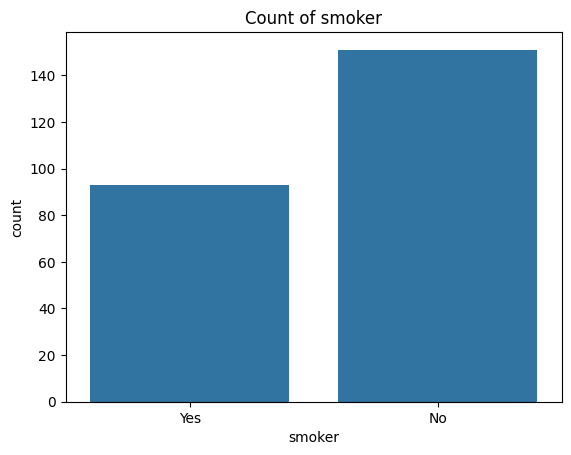

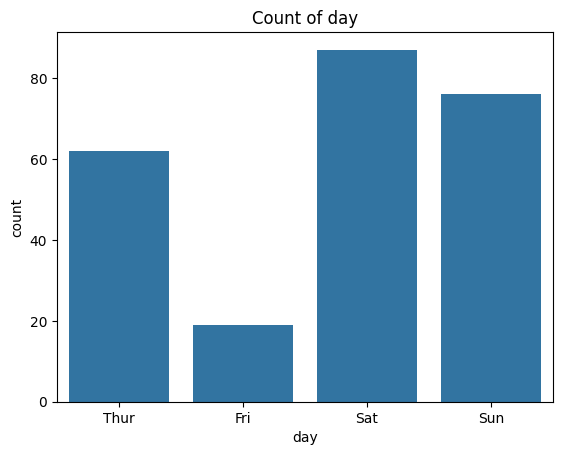

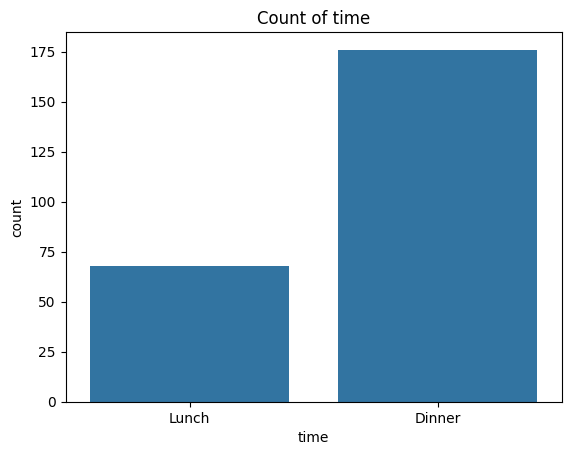

In [5]:
# Categorical conversion
for col in ['sex','smoker','day','time']:
    df[col] = df[col].astype('category')

# Univariate
sns.histplot(df['total_bill'], bins=20, kde=True, color='orange')
plt.title('Total Bill Distribution')
plt.show()

sns.boxplot(x=df['tip'], color='green')
plt.title("Tip Distribution")
plt.show()
for col in df.select_dtypes('category').columns:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()

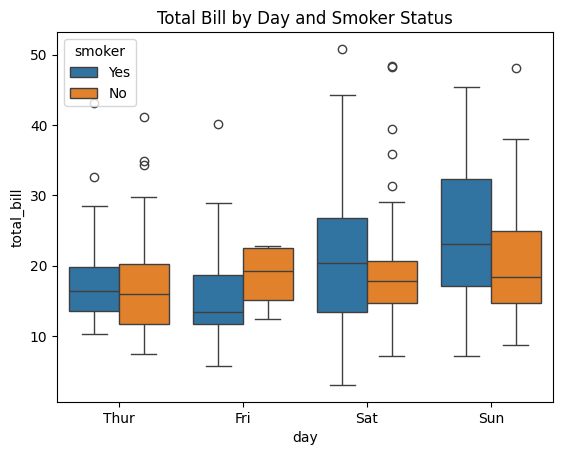

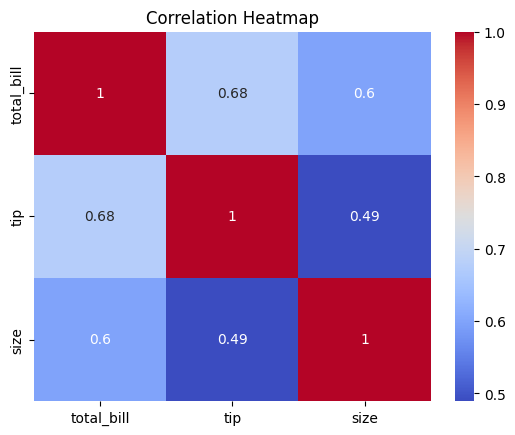

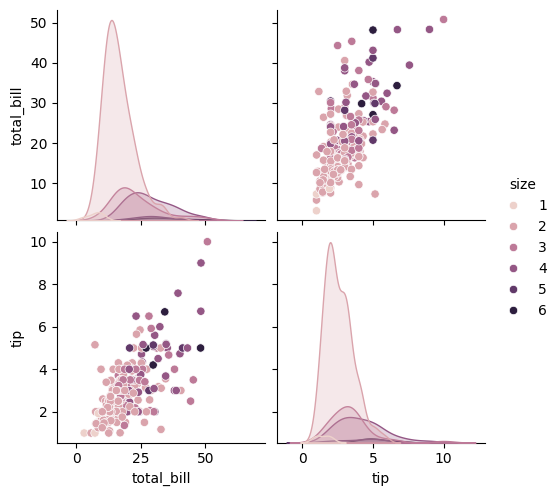

In [6]:
# Bivariate
sns.boxplot(x='day', y='total_bill', hue='smoker', data=df)
plt.title('Total Bill by Day and Smoker Status')
plt.show()

corr = df[['total_bill','tip','size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df[['total_bill','tip','size']], hue='size')
plt.show()

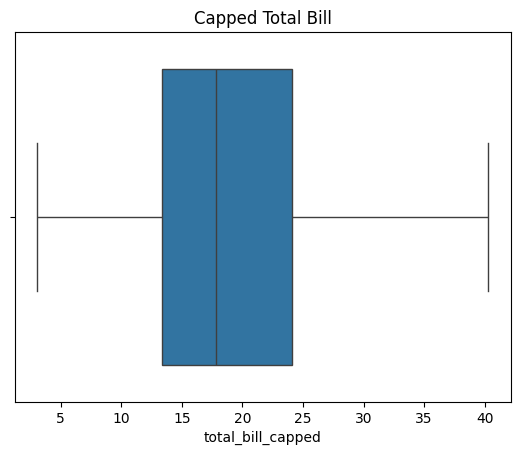

In [7]:

# Outlier
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
df['total_bill_capped'] = df['total_bill'].clip(lower, upper)

sns.boxplot(x=df['total_bill_capped'])
plt.title('Capped Total Bill')
plt.show()

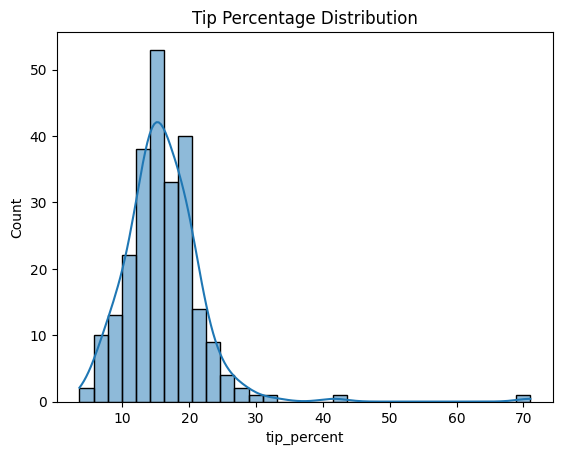

In [8]:
# Feature Engineering
df['tip_percent'] = (df['tip']/df['total_bill'])*100
sns.histplot(df['tip_percent'], kde=True)
plt.title('Tip Percentage Distribution')
plt.show()

In [9]:
df.to_csv("Tips_cleaned.csv", index=False)